# Introduction to Machine Learning with PyTorch
## PyIU Advanced Python Workshop

Author: Caleb Choban

Last modified: 4/15/2025

In this code tutorial we will learn the basics of machine learning (ML) using the Python module Pytorch.
To do this, we will train a convolutional neutral network to identify hand written numbers. This example uses the MNIST dataset of hand written numbers which is considered the "Hello World" of machine learning.

## **What you will learn in this exercise**

* How to use PyTorch
* The data you need to build a ML model
* How a ML model is trained
* How to check the accuracy of a ML model



We first need to import the Python module PyTorch, a commonly used machine learning toolkit. PyTorch includes many useful tools for building and training ML models in a streamlined manner regardless of the type of model you want to build or the type of data you want to train your model on.

Run the code below to import the PyTorch `torch` module along with some functions we wil use in our example.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

To confirm torch has been imported properly run the code below to print the version number of `torch`.

In [ ]:
print(torch.__version__)

2.6.0+cu124


## Determining what you want a machine learning model to do?
The first step before making a ML model is to determine what you want it to do.

Do you want a model that predicts the next word in a sentence, the age of someone in a photograph, or predict the score of an upcoming sports game? The possibilites are endless.

The next step is to assemble a set of data you can train and test the model on. These data sets, called a **training set** and **testing set** respectively, are a collection of labelled data related to the type of predictions you want your model to make. The label for each data component represent the **ground truth**, which is the answer you want for the data.
The **training set** is used to train the ML model, while the **testing set** is used to validate the ML model once it is trained.

A list of possible data sets and their corresponding ground truths for the above mentioned examples are listed below.
1. A collection sentences from college essays. The ground truth would be the word after each preceeding word.
2. A compilation of headshots. The ground truth would be the age of each person included in the metadata in each image.
3. A collection of previous sports games cover the last X years for various teams across various sports. The ground truth would be the final score of each game.


As you can imagine, this labelled data isn't usually lying around nor easily accessible. Typically someone must compile the data of interest and then label it by hand, a labourious process.


For a fun demonstration, check out the interactive demo on https://www.3blue1brown.com/lessons/neural-networks.


### **What we will do in this exercise**


For this exercise we will make a model which looks at a hand written numbers and tell you what that number is.

For our training and testing set we will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of hand drawn numbers which is considered the "Hello World" dataset of machine learning.
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and lets you get started quickly.




## Assembling a Training and Testing Set


The code below downloads and transforms the training and testing data into a format easily readable by PyTorch. The data will then be loaded and ready to be fed to our machine learning model.

A short list of the things being done in the code below are
- Transforming the data into tensors. You can think of this as a multidimensional array which will contain our data and ground truth in an easily usable format for PyTorch.
- Building a data loader. `DataLoader` is used to easily and efficiently feed data in batches to your machine learning model, since it's not effecient to give the entire data set to the model at once.
- Create batches of data.  The `BATCH_SIZE` parameter inside the data loader determines how many pieces of data from our data set are fed into our ML model at a time. We use batches of `16` in this tutorial but you can change it.

In [ ]:
BATCH_SIZE = 16

# This will transform the data we load into a tensor
transform = transforms.Compose([torchvision.transforms.ToTensor()])

# This points to the training set we are going to use. We are using the MNIST training set.
# train=True specifies we want the training set, download=True locally downloads the set,
# and transform sets how we want to transform the data which in our case is into tensors
train_set = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=transform)
# This loads the training set in batches of size BATCH_SIZE
# shuffle=True shuffles the data so that it is not in the same sequence each time we load it
train_loader = torch.utils.data.DataLoader(train_set,
                          batch_size=BATCH_SIZE, shuffle=True)

# This points to the test MNIST data set
test_set = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=transform)
# This loads the test set in batches of size BATCH_SIZE
test_loader = torch.utils.data.DataLoader(test_set,
                           batch_size=BATCH_SIZE, shuffle=True)

print('\n')
print(train_set)
print(test_set)

100%|██████████| 9.91M/9.91M [00:00<00:00, 53.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]



Dataset MNIST
    Number of datapoints: 60000
    Root location: /files/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: /files/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


Note the print statements for the train and test data set. With these we can confirm that the train data set has 60000 images (called datapoints) and the test data set has 10000 images.

## Visualizing the data set

It's always good practice to understand the data you are using to train your ML model.

Below we visualize the **training set** by making images of a few of the numbers along with the **ground truths** for each image.

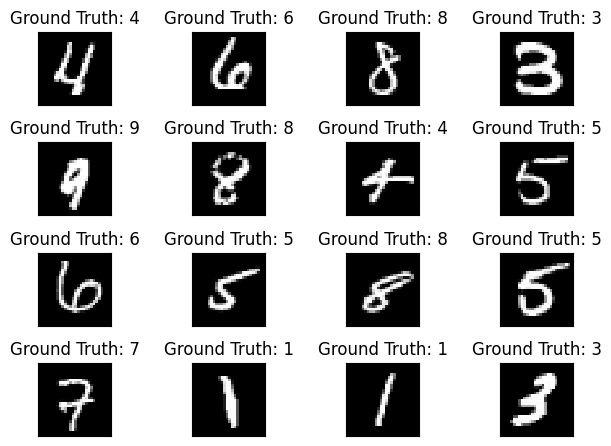

In [ ]:

# This converts the data loader for the train data into a enumerator object
# Then calling next for the enumerator will output BATCH_SIZE many pieces of data from your data set
examples = enumerate(train_loader)
batch_idx, (example_images, example_targets) = next(examples)

# This plots the example data along with the ground truth for each piece of data
fig = plt.figure()
for i in range(BATCH_SIZE):
  plt.subplot(int(np.ceil(BATCH_SIZE/4)),4,i+1)
  plt.tight_layout()
  plt.imshow(example_images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


We should also check the dimensions of the data to better understand it.
Below we print the dimensions of the images and the labels.

Remember that the `BATCH_SIZE` is 16 and the images are 28 x 28 pixels in size.

In [ ]:
print("Image batch dimensions:", example_images.shape)
print("Image label dimensions:", example_targets.shape)

Image batch dimensions: torch.Size([16, 1, 28, 28])
Image label dimensions: torch.Size([16])


## Making a Convolutional Neural Network Model


Below we will make a convolutional neural network or CNN for short.
CNNs are a type of ML model that is good for dealing with data in a grid format like an image. CNNs are commonly used in "computer vision" which is when you want a computer to process an image.

The code below defines a CNN including 2 CNN layers and max pooling layer.

1. `Conv2d`: A CNN layer which extracts features from input images using a small filter/windown called a `kernel`. The kernel slide over the image, performing a convolution operation to create feature maps, which highlight patterns and textures.


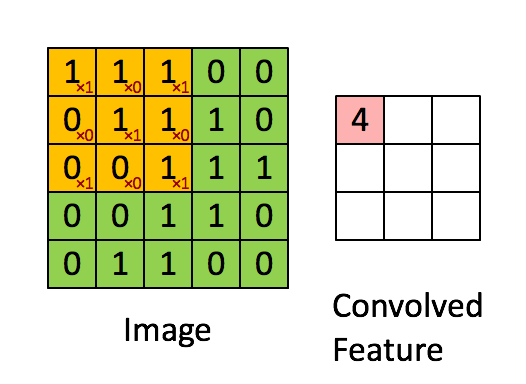


2. `MaxPool2d`: This is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

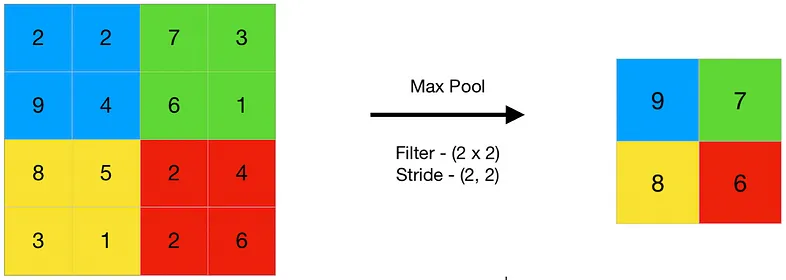


3. `Linear`: This last layer maps to the final number of outputs. For our example we will use 10 representing the 10 digits we want to predict.



There are various inputs to each layer we can vary such as the
* `conv_kernel_size`: the NxN pixel kernel window the CNN uses to look at the image
* `first_out_channel`: the number of nodes in the first layer of the CNN. This determines the number of unique features or patterns that a convolutional layer can learn and extract from an input image.
* `second_out_channel`: the number of nodes in the second layer of the CNN


There are other parameters such as `padding` and `stride`, but we won't cover them here since they are beyong scope of this example exercise.





Note that for PyTorch you define your ML model as a class with the initialization `__init__` function defining the components of the model and the `foward` function defining how data is passed between the layers of the model.
For more information on Python classes check out https://www.w3schools.com/python/python_classes.asp.

In [ ]:
conv_kernel_size = 2 # The kernel is an NxN pixel window the CNN uses to look at the image
first_out_channel = 10 # This sets the number of nodes in the first layer of the CNN
second_out_channel = 8 # This sets the number of nodes in the second layer


class CNN(nn.Module):
   def __init__(self, in_channels, num_classes):

       """
       Building blocks of convolutional neural network.

       Parameters:
           * in_channels: Number of channels in the input image (for grayscale images, 1)
           * num_classes: Number of classes to predict. In our problem, 10 (i.e digits from  0 to 9).
       """
       super(CNN, self).__init__()

       # 1st convolutional layer
       self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=first_out_channel, kernel_size=conv_kernel_size, padding=1)
       # Max pooling layer
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       # 2nd convolutional layer
       self.conv2 = nn.Conv2d(in_channels=first_out_channel, out_channels=second_out_channel, kernel_size=conv_kernel_size, padding=1)
       # Fully connected layer
       self.fc1 = nn.Linear(second_out_channel * 7 * 7, num_classes)

   def forward(self, x):
       """
       Define the forward pass of the neural network.

       Parameters:
           x: Input tensor.

       Returns:
           torch.Tensor
               The output tensor after passing through the network.
       """
       x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x

Below we intitialize our CNN telling it the inputs it will be given and the number of outputs we want.

For our problem we are inputting grey-scale images which is treated as an input of 1 for CNNs. RGB color images would require 3 inputs.

For the outputs, we want 10 outputs corresponding to the 10 digits (0-9) we want the model to identify.

Note the print statement at the end which outputs the architecture of our CNN.

In [ ]:
# check if a CUDA-capable GPU is available. If it is, the model will run on the GPU for faster computation; otherwise, it defaults to the CPU.
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=392, out_features=10, bias=True)
)


## Training the Model


Now that we have a model we want to train it to learn how to identify numbers. However to do this we need to determine two things.

1. How do we tell the model whether its predictions are good or bad.

For this we define a loss function which takes the predicted values from our model along with the known ground truth and does some math to quantify how correct the model is. This results in a single number, with a smaller loss number meaning the model is more accurate.

2. How the model changes the weights it uses to make predictions.

For this we will define an optimizer which tells the model how to change based on the values from the loss function. One critical part of this is the `learning_rate` parameter which tells the model how quickly it can change. A larger value means the model makes larger changes but this does not mean it will converge to the correct answer faster and can cause it to 'over-shoot' its corrections.



In [ ]:
learning_rate = 0.0001 # This sets rate at which the model can change its parameters

loss_criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Now that we have defined the loss and optimizer function we can now train our model.

One other important parameter we define here is the number of epochs `num_epochs`. This sets how many times we pass over the entire training set when training out model. The more epochs, the more we train the model.

In [ ]:
num_epochs=3 # This sets how many times we pass over the entire training set.

# These keep track of the number of images we train the model on,
# the results of the loss function, and the model accuracy

train_losses = []
train_counter = []
train_accuracy = []


for epoch in range(num_epochs):
  # Iterate over training batches
  print(f"Epoch [{epoch + 1}/{num_epochs}]")

  for batch_index, (images, labels) in enumerate(tqdm(train_loader)):
    images = images.to(device)
    labels = labels.to(device)
    scores = model(images)
    loss = loss_criterion(scores, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Keep track of the number of images we train out model with
    train_counter.append(
        (batch_index*BATCH_SIZE) + (epoch*len(train_loader.dataset)))
    # Keep track of the loss function outputs for each batch of training data
    train_losses.append(loss.item())
    # Determine the accuracy of the model for the image batch
    predicted_digits = torch.max(scores, 1)[1]
    corrects = (predicted_digits == labels).sum()
    accuracy = 100.0 * corrects/BATCH_SIZE
    train_accuracy.append(accuracy.item())



Epoch [1/3]


100%|██████████| 3750/3750 [00:32<00:00, 115.24it/s]


Epoch [2/3]


100%|██████████| 3750/3750 [00:33<00:00, 112.83it/s]


Epoch [3/3]


100%|██████████| 3750/3750 [00:31<00:00, 117.31it/s]


Now that the model has been trained we want to check how its accuracy and loss function have changed with each training iteration.

The code below plots both of these versus the number of training examples seen. We want our model to become more accurate with each training iteration and the loss function should also decrease.

Note that our model does become more accurate the more it is trained but its accuracy isn't 100%.

Text(0, 0.5, 'negative log likelihood loss')

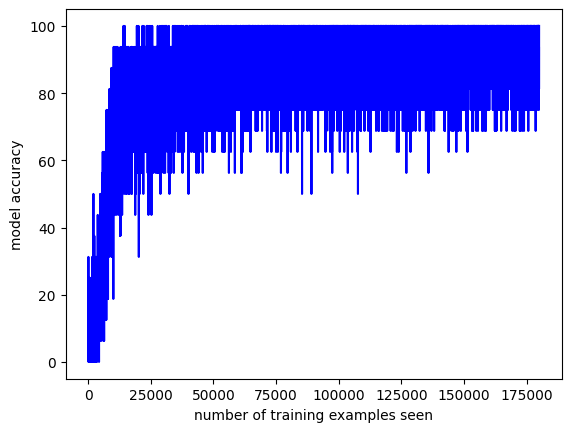

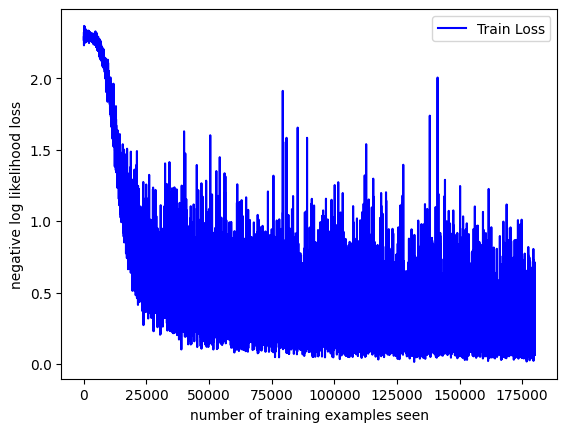

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_accuracy, color='blue')
plt.xlabel('number of training examples seen')
plt.ylabel('model accuracy')



fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

## Testing out Trained Model

Now that our model has been trained we want to test it against our `training set`, a set of images the model has never seen before. Why do you think we want to test our model in such a way? Why not use the training data?


The code below plots a batch of the test images along with our CNN model predictions and the ground truth for each image.

Run the code multiple times since each time a new batch of images will be shown. Is our model 100% accruate?

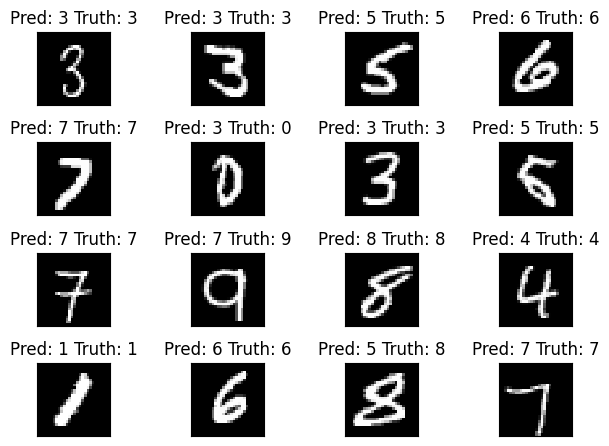

In [ ]:
# This converts the data loader for the train data into a enumerator object
# Then calling next for the enumerator will output BATCH_SIZE many pieces of data from your data set
examples = enumerate(train_loader)
batch_idx, (example_images, example_targets) = next(examples)

# Feed in one batch of images to our trained model
scores = model(example_images)
predicted_digits = torch.max(scores, 1)[1]

# This plots the example data along with the ground truth for each piece of data
fig = plt.figure()
for i in range(BATCH_SIZE):
  plt.subplot(int(np.ceil(BATCH_SIZE/4)),4,i+1)
  plt.tight_layout()
  plt.imshow(example_images[i][0], cmap='gray', interpolation='none')

  plt.title("Pred: {} Truth: {}".format(predicted_digits[i],example_targets[i]))
  plt.xticks([])
  plt.yticks([])

Now lets check the accuracy of the model against the entire training set. The code below will get the predicitions of the model for all images in the training set and calculate the overall accuracy of our model.

In [ ]:

# Iterate over the test dataset batches
model.eval() # Put the model in evaluation mode instead of training mode. This makes it run faster.
with torch.no_grad():
  # Keep track of the total number of test images and the number of test images correctly predicted by the model
  num_test_images = 0
  num_correct_predictions = 0
  for batch_index, (images, labels) in enumerate(tqdm(test_loader)):
    # Get predicted probabilities for test data batch
    scores = model(images)


    predicted_digits = torch.max(scores, 1)[1]
    corrects = (predicted_digits == labels).sum()

    num_correct_predictions += corrects.item()
    num_test_images+= BATCH_SIZE

test_accuracy = 100.0 * num_correct_predictions/num_test_images

#Compute total test accuracy
print(f"\n Test accuracy {test_accuracy}% for {num_test_images} test images")

100%|██████████| 625/625 [00:03<00:00, 197.91it/s]


 Test accuracy 91.92% for 10000 test images


## Improving our model

A model accuracy <95% is not ideal, so we should try to improve it.

Below we list possible parameters we could vary to improve our model. We encourage you to play around with them and see what happens.
**Make sure you reintialize your model with each variation** by rerunning the code snippet below.

* Vary the kernel size (`conv_kernel_size`). If our kernel size is too small we could miss larger features in our image, If its too large we could miss smaller details.
* Increase the number of epochs (`num_epochs`) we train the model. If our model is not well converged then it may not have been trained for long enough. Increasing the number of epochs until we see model convergence could help.
* Vary the learning rate (`learning_rate`). If our model's learning rate is to slow it may take longer to converge or can get "stuck" around a suboptimal solution. If our model's learning rate is too fast it can change its weights wildly and never converge on a good solution.
* Vary the model CNN layer channels (`first_out_channel` and `second_out_channel`). These determine the number of unique features or patterns that a convolutional layer can learn and extract from an input image. If its too small we may miss important features. Too high our model could make up features or subdivide features.



In [ ]:
# check if a CUDA-capable GPU is available. If it is, the model will run on the GPU for faster computation; otherwise, it defaults to the CPU.
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=392, out_features=10, bias=True)
)


## Final Words
That's it for this tutorial! Congratulations! You are now able to implement a basic CNN model in PyTorch for image classification. If you would like, you can further extend the CNN model by adding more convolution layers and max pooling, but as you saw, you don't really need it here as results look good.

For a more detailed explanation of CNN check out this video series and lessons from **3blue1brown**.

https://www.youtube.com/watch?v=aircAruvnKk

https://www.3blue1brown.com/lessons/neural-networks

## Acknowledgements

This notebook was adapted from https://www.datacamp.com/tutorial/pytorch-cnn-tutorial.
